In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [24]:
df = pd.read_csv('bio.csv')

df = df[["Age", "Gender", "BMI", "Body weight ", "Height ", "Fasting GLU - PDL (Lab)", "Insulin "]]

In [25]:
df["HOMA-IR"] = (df["Fasting GLU - PDL (Lab)"] * df["Insulin "]) / (22.5 * 4.0)
df = df.drop(columns=["Fasting GLU - PDL (Lab)", "Insulin "])
df.columns

Index(['Age', 'Gender', 'BMI', 'Body weight ', 'Height ', 'HOMA-IR'], dtype='object')

In [26]:
df.head()

,Age,Gender,BMI,Body weight,Height,HOMA-IR
0,27,M,22.265239,133.8,65.0,2.527778
1,49,F,30.946742,169.2,62.0,15.293333
2,59,F,26.948690,157.0,64.0,22.813333
3,33,F,42.384279,262.6,66.0,22.633333
4,51,F,30.957534,172.0,62.5,20.640000


In [27]:
gender_map = {
    "M": 1,
    "F": 0
}
df["Gender"] = df['Gender'].map(gender_map)


In [28]:
df.head()

,Age,Gender,BMI,Body weight,Height,HOMA-IR
0,27,1,22.265239,133.8,65.0,2.527778
1,49,0,30.946742,169.2,62.0,15.293333
2,59,0,26.948690,157.0,64.0,22.813333
3,33,0,42.384279,262.6,66.0,22.633333
4,51,0,30.957534,172.0,62.5,20.640000


In [29]:
df.describe()

,Age,Gender,BMI,Body weight,Height,HOMA-IR
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,48.111111,0.355556,31.149765,182.502222,64.376667,19.680568
std,12.703296,0.484090,6.728244,35.990090,3.277742,13.591106
min,18.000000,0.000000,20.689962,116.800000,59.000000,2.527778
25%,40.000000,0.000000,26.922934,157.000000,62.000000,10.126667
50%,51.000000,0.000000,30.038349,180.000000,64.000000,19.080000
75%,58.000000,1.000000,35.918461,202.000000,67.000000,22.874444
max,69.000000,1.000000,49.088236,284.600000,72.000000,76.302222


In [32]:
scaler = StandardScaler()
df[["Age", "BMI", "Body weight ", "Height ", "HOMA-IR"]] = scaler.fit_transform(df[["Age", "BMI", "Body weight ", "Height ", "HOMA-IR"]])
df.describe()

,Age,Gender,BMI,Body weight,Height,HOMA-IR
count,4.500000e+01,45.000000,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01
mean,-2.861908e-16,0.355556,-8.955799e-16,-7.956598e-17,4.835638e-16,2.763222e-16
std,1.011300e+00,0.484090,1.011300e+00,1.011300e+00,1.011300e+00,1.011300e+00
min,-2.397123e+00,0.000000,-1.572178e+00,-1.846193e+00,-1.658893e+00,-1.276321e+00
25%,-6.457194e-01,0.000000,-6.353208e-01,-7.165970e-01,-7.332861e-01,-7.108957e-01
50%,2.299823e-01,0.000000,-1.670533e-01,-7.031093e-02,-1.162151e-01,-4.468762e-02
75%,7.872470e-01,1.000000,7.167667e-01,5.478758e-01,8.093915e-01,2.376530e-01
max,1.662949e+00,1.000000,2.696271e+00,2.868886e+00,2.352069e+00,4.213157e+00


In [33]:
df.to_csv("stuff.csv", index=False)

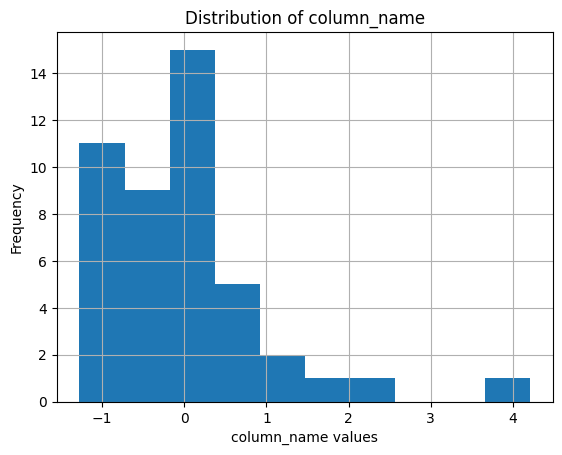

In [35]:
import matplotlib.pyplot as plt
df['HOMA-IR'].hist()

# Add title and labels (optional)
plt.title('Distribution of column_name')
plt.xlabel('column_name values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [45]:
import seaborn as sns
df.corr(method='spearman').style.background_gradient(cmap='coolwarm', axis=None)

,Age,Gender,BMI,Body weight,Height,HOMA-IR
Age,1.000000,-0.055461,-0.036334,-0.041478,-0.151231,0.035015
Gender,-0.055461,1.000000,-0.153707,0.071494,0.491846,-0.221625
BMI,-0.036334,-0.153707,1.000000,0.845614,-0.429856,0.686298
Body weight,-0.041478,0.071494,0.845614,1.000000,0.053692,0.453045
Height,-0.151231,0.491846,-0.429856,0.053692,1.000000,-0.457115
HOMA-IR,0.035015,-0.221625,0.686298,0.453045,-0.457115,1.000000
